<b> A complete guide: https://scikit-learn.org/stable/modules/clustering.html </b>

In [176]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram

In [178]:
df = pd.read_csv("seismic-bumps.csv")

In [179]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,hazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0


In [180]:
# Applying log transform

df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

In [ ]:
X = df[['log_t_genergy', 'log_t_gpuls']].to_numpy()
Y = df[['gdenergy', 'gdpuls']].to_numpy()
Z = df[['energy', 'maxenergy']].to_numpy()

In [181]:
# Sum of Squared Error (SSE)
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse_list.append( kmeans.inertia_ )

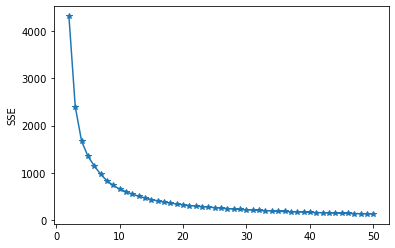

In [182]:
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

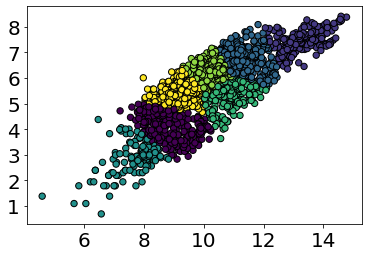

In [183]:
kmeans = KMeans( n_clusters=7, n_init=20, max_iter=100 )
kmeans.fit(X)

plt.scatter( X[:,0], X[:,1], s=40, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

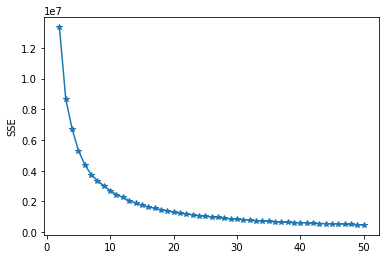

In [184]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(Y)
    sse_list.append( kmeans.inertia_ )
    
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

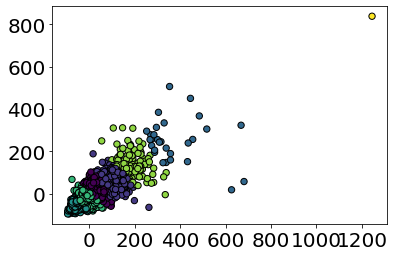

In [185]:
kmeans = KMeans( n_clusters=7, n_init=10, max_iter=100 )
kmeans.fit(Y)

plt.scatter( Y[:,0], Y[:,1], s=40, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

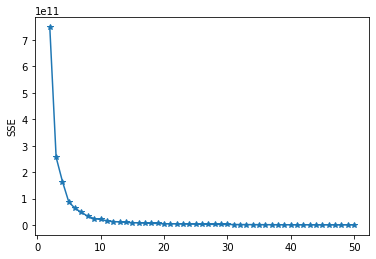

In [186]:
sse_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(Z)
    sse_list.append( kmeans.inertia_ )
    
plt.plot(range(2, len(sse_list)+2), sse_list, marker='*')
plt.ylabel('SSE')
plt.show()

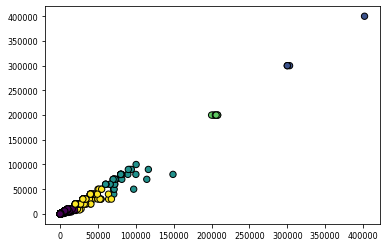

In [187]:
kmeans = KMeans( n_clusters=5, n_init=10, max_iter=100 )
kmeans.fit(Z)

plt.scatter( Z[:,0], Z[:,1], s=40, edgecolor='black', c= kmeans.labels_ )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

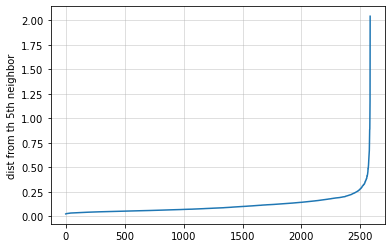

In [188]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

k=6
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')

plt.grid(alpha=0.5)
plt.show()

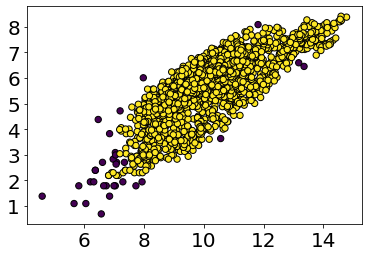

In [189]:
dbscan = DBSCAN( eps=0.25, min_samples=5)
dbscan.fit(X)

plt.scatter( X[:,0], X[:,1], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

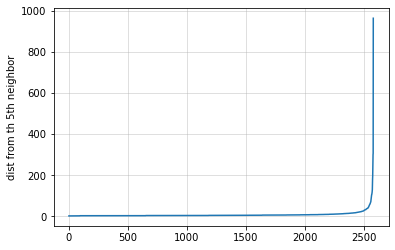

In [190]:
dist = pdist(Y, 'euclidean')
dist = squareform(dist)

k=6
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')

plt.grid(alpha=0.5)
plt.show()

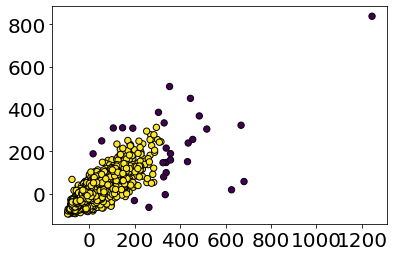

In [191]:
dbscan = DBSCAN( eps=40, min_samples=5)
dbscan.fit(Y)

plt.scatter( Y[:,0], Y[:,1], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

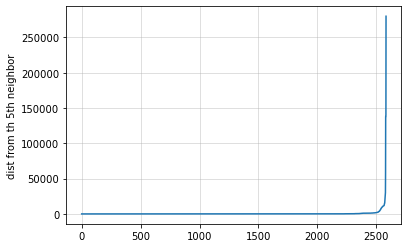

In [192]:
dist = pdist(Z, 'euclidean')
dist = squareform(dist)

k=6
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from th 5th neighbor')

plt.grid(alpha=0.5)
plt.show()

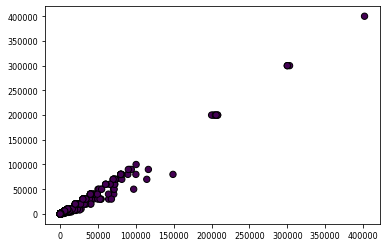

In [201]:
dbscan = DBSCAN( eps=8000, min_samples=5)
dbscan.fit(Y)

plt.scatter( Z[:,0], Z[:,1], s=40, edgecolor='black', c= dbscan.labels_ )

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()